
# Hand Written Digit Prediction

The digits dataset consists of 8x8 pixel images of digits. The images attributes of the dataset stroe 8x8 arrays of grayscale vlaues for eachimage. We'll use these arrays to visualize the first 5 images. The target attributes of the dataset stores the digit each image represents.

Dataset is collect from sklearn library

# Import Library

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Import Data

In [5]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

# Data Visualization

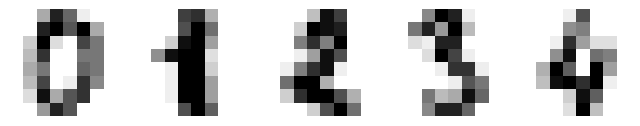

In [6]:
images = digits.images[:5]

fig, axis = plt.subplots(nrows=1, ncols=len(images), figsize=(8, 3))
for ax, image in zip(axis, images):
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.axis('off')
plt.show()

# Describe Data

In [7]:
digits.images.shape

(1797, 8, 8)

In [8]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
digits.images[0].shape

(8, 8)

In [10]:
len(digits.images)

1797

# Data Preprocessing

In [11]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [12]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
data.shape

(1797, 64)

In [14]:
data.min()

0.0

In [15]:
data.max()

16.0

In [16]:
data = data/16

In [17]:
data.max()

1.0

In [18]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Define Target Variable (y) and Feature Variables (X)

In [31]:
X = data
y = digits.target

# Train Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Modeling

In [22]:
model = RandomForestClassifier()

In [23]:
model.fit(X_train, y_train)

RandomForestClassifier()

# Prediction

In [24]:
y_pred = model.predict(X_test)

In [26]:
y_pred

array([2, 0, 4, 9, 6, 6, 6, 3, 1, 5, 7, 9, 6, 3, 1, 4, 2, 0, 7, 7, 6, 5,
       8, 2, 4, 8, 0, 4, 6, 1, 8, 2, 7, 9, 5, 1, 6, 1, 8, 2, 6, 4, 1, 2,
       6, 4, 2, 3, 7, 7, 2, 7, 2, 2, 1, 3, 5, 5, 5, 3, 4, 3, 8, 2, 3, 7,
       8, 1, 5, 3, 0, 8, 9, 2, 5, 7, 3, 1, 8, 9, 4, 1, 8, 5, 4, 9, 5, 6,
       4, 7, 6, 8, 1, 0, 1, 0, 4, 8, 0, 3, 2, 4, 9, 6, 7, 0, 3, 7, 2, 5,
       1, 3, 3, 5, 0, 7, 3, 0, 1, 5, 6, 4, 9, 4, 0, 5, 9, 0, 5, 7, 8, 9,
       2, 0, 0, 8, 9, 2, 2, 5, 1, 9, 5, 1, 0, 7, 1, 0, 7, 9, 0, 0, 2, 3,
       1, 0, 6, 5, 0, 1, 3, 3, 6, 2, 8, 7, 0, 6, 0, 0, 4, 4, 5, 0, 1, 9,
       9, 1, 5, 1, 3, 3, 8, 9, 1, 4, 4, 4, 5, 4, 9, 4, 4, 6, 1, 7, 3, 3,
       8, 0, 7, 4, 6, 8, 0, 2, 8, 5, 8, 5, 3, 5, 0, 9, 4, 6, 8, 7, 9, 5,
       0, 1, 0, 4, 7, 6, 6, 6, 2, 2, 0, 5, 0, 4, 5, 2, 2, 3, 5, 8, 9, 2,
       9, 1, 0, 1, 3, 6, 7, 8, 6, 5, 9, 8, 8, 7, 9, 5, 6, 9, 9, 2, 8, 9,
       3, 4, 4, 7, 0, 5, 5, 2, 0, 9, 6, 0, 7, 2, 5, 2, 6, 1, 7, 5, 4, 2,
       3, 8, 4, 4, 2, 8, 7, 5, 4, 8, 7, 6, 0, 4, 1,

# Model Evaluation

In [28]:
confusion_matrix(y_test, y_pred)

array([[61,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 60,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 0,  0, 57,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 55,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  0, 45,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 53]], dtype=int64)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.98      0.97      0.98        62
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        44
           4       0.98      0.98      0.98        56
           5       0.98      1.00      0.99        55
           6       0.94      1.00      0.97        51
           7       1.00      1.00      1.00        50
           8       0.98      0.94      0.96        48
           9       0.96      0.96      0.96        55

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

